In [11]:
import pandas as pd

In [12]:
folder = "conv_300_0124_default"
data = "server.log_instance.csv"
df = pd.read_csv(folder + "/" + data)

print(df.head())

      timestamp                       instance_id  step_id  gpu_cache_usage  \
0  1.737687e+09  597bab9cba9e487e8ce758bd2bc8169a        0         0.000000   
1  1.737687e+09  b00be803147442788e1bba0227ee2edf        0         0.000000   
2  1.737687e+09  87c94fa465cc4b3cafe81c8493a326df        0         0.000000   
3  1.737687e+09  1d25a4d0d2a84871b8eee1b09315f49d        0         0.000000   
4  1.737688e+09  b00be803147442788e1bba0227ee2edf    35591         0.010882   

   num_available_gpu_blocks  instance_load  max_tot_tokens  \
0                      9462           -inf               0   
1                      9462           -inf               0   
2                      9462           -inf               0   
3                      9462           -inf               0   
4                      9358   -3119.333333               0   

   num_running_requests  num_waiting_requests  num_killed_requests  \
0                     0                     0                    0   
1           

In [13]:
import matplotlib.pyplot as plt

In [14]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s", errors="coerce")

df["normalized_time"] = df.groupby("instance_id")["timestamp"].transform(
    lambda x: (x - x.min()).dt.total_seconds()  # 转换为从0开始的秒数
)

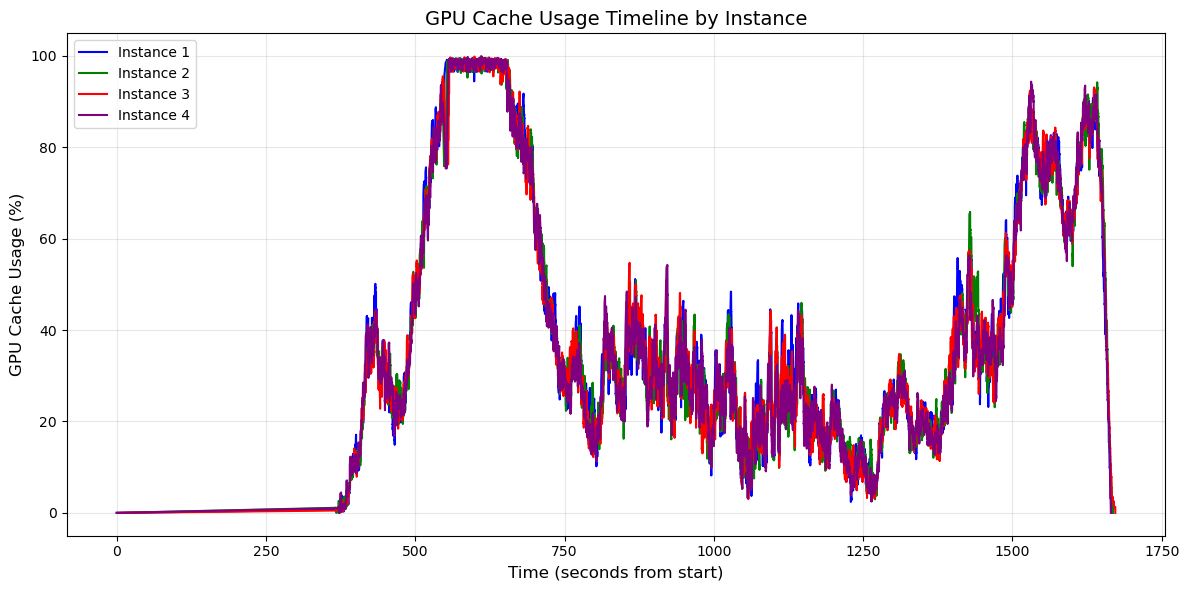

In [15]:
plt.figure(figsize=(12, 6))

# 4. 为每个instance绘制折线
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

colors = ["blue", "green", "red", "purple"]
for instance, color in zip(range(1,len(instances) + 1), colors):
    instance_data = df[df["instance_id_mapped"] == instance]
    plt.plot(
        instance_data["normalized_time"],
        instance_data["gpu_cache_usage"] * 100,
        label=f"Instance {instance}",
        color=color,
        linewidth=1.5
    )

# 5. 添加图表元素
plt.title("GPU Cache Usage Timeline by Instance", fontsize=14)
plt.xlabel("Time (seconds from start)", fontsize=12)
plt.ylabel("GPU Cache Usage (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)

# 6. 优化显示
plt.tight_layout()

# save as pdf
plt.savefig(folder + "/gpu_cache_usage_timeline.pdf", format="pdf")
plt.show()


In [16]:
import numpy as np

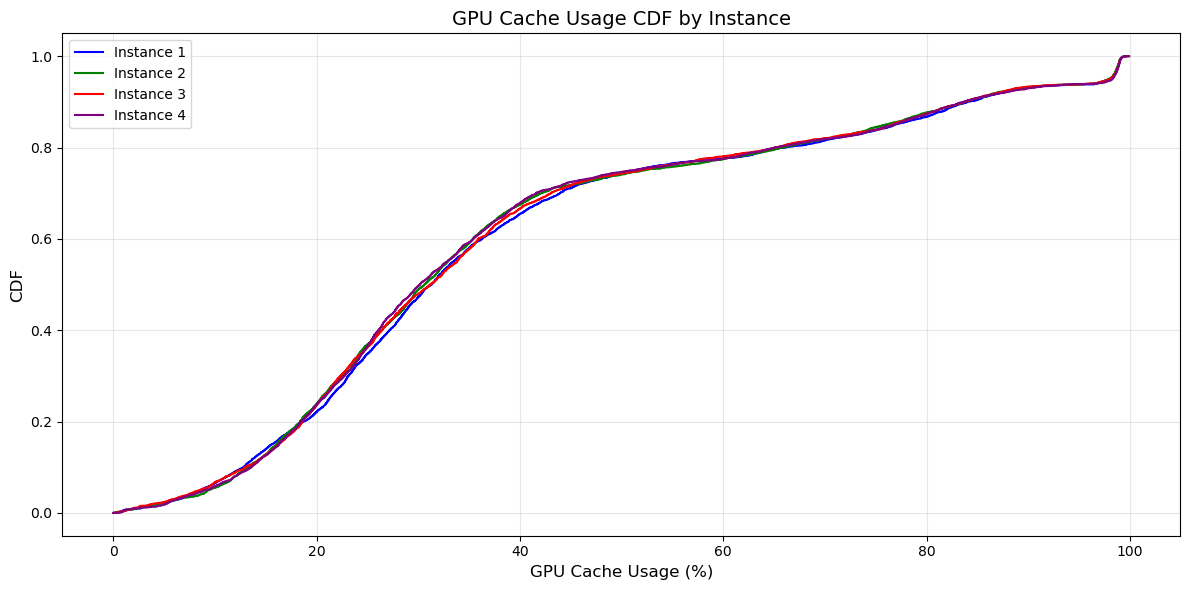

In [17]:
plt.figure(figsize=(12, 6))

# 4. 为每个instance绘制折线
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

colors = ["blue", "green", "red", "purple"]
for instance, color in zip(range(1,len(instances) + 1), colors):
    instance_data = df[df["instance_id_mapped"] == instance]
    data = instance_data["gpu_cache_usage"] * 100
    sorted_data = np.sort(data)
    cdf = np.linspace(0, 1, len(sorted_data))
    plt.step(sorted_data, cdf, label=f"Instance {instance}", color=color, linewidth=1.5)
    

# 5. 添加图表元素
plt.title("GPU Cache Usage CDF by Instance", fontsize=14)
plt.xlabel("GPU Cache Usage (%)", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)

# 6. 优化显示
plt.tight_layout()

# 7. 保存或显示图像
plt.savefig(folder + "/gpu_cache_usage_cdf.pdf", format="pdf")
plt.show()


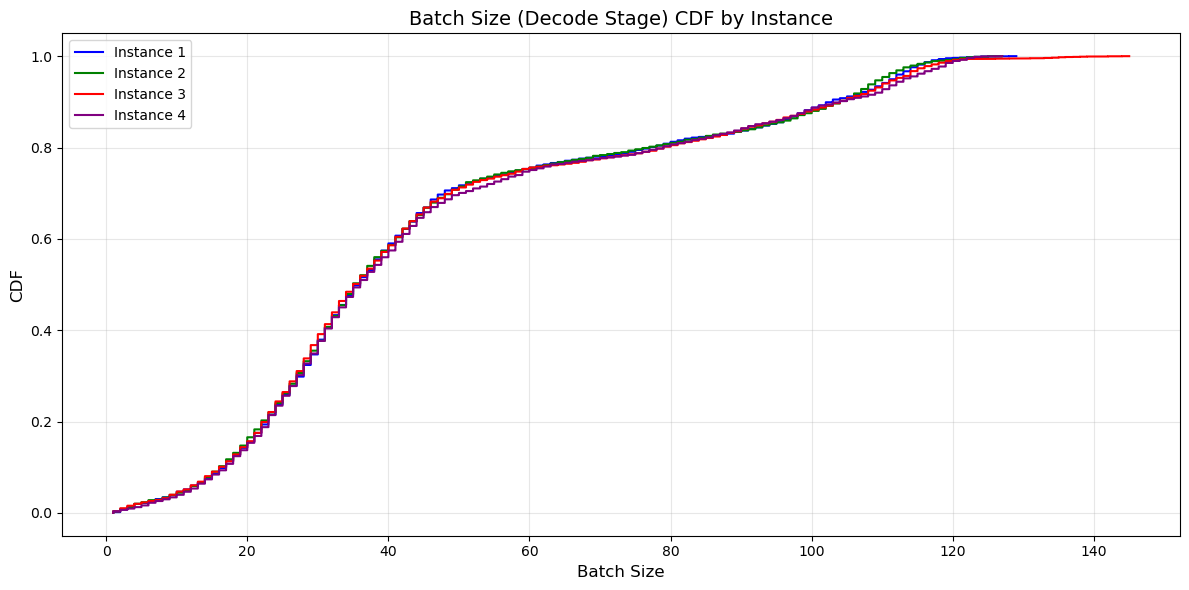

In [18]:
plt.figure(figsize=(12, 6))

# 4. 为每个instance绘制折线
instances = df["instance_id"].unique()
id_mapping = {id: i+1 for i, id in enumerate(instances)}
df["instance_id_mapped"] = df["instance_id"].map(id_mapping)

colors = ["blue", "green", "red", "purple"]
for instance, color in zip(range(1,len(instances) + 1), colors):
    instance_data = df[df["instance_id_mapped"] == instance]
    instance_data = instance_data[instance_data['inference_type'] == 'decode']
    data = instance_data["bs"]
    sorted_data = np.sort(data)
    cdf = np.linspace(0, 1, len(sorted_data))
    plt.step(sorted_data, cdf, label=f"Instance {instance}", color=color, linewidth=1.5)
    

# 5. 添加图表元素
plt.title("Batch Size (Decode Stage) CDF by Instance", fontsize=14)
plt.xlabel("Batch Size", fontsize=12)
plt.ylabel("CDF", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc="best", frameon=True)

# 6. 优化显示
plt.tight_layout()
plt.savefig(folder + "/batch_size_cdf_decode.pdf", format="pdf")
plt.show()
